In [28]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [29]:
with open('../input/passenger-dtypes.yaml', 'r') as yamlfile:
    column_types = yaml.load(yamlfile)

read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
                 'dtype': column_types,
                 'parse_dates': ['MissionDate'],
                 'infer_datetime_format': True}

df = pd.read_csv('../input/ice-air-passengers.csv.gz', **read_csv_opts)

In [30]:
pickups = df['PULOC'] == 'KBFI'
dropoffs = df['DropLoc'] == 'KBFI'
kbfi = df.loc[pickups | dropoffs]

In [31]:
kbfi.set_index('MissionDate', inplace=True)

In [32]:
kbfi = kbfi['2018-10-01':]

In [33]:
del df

In [34]:
# kykm = pd.read_csv('../input/ICEAirKYKM20191016.csv', header=1)
# kykm = pd.read_csv('../input/ICEAirKYKM20191226.csv', header=1)
# kykm = pd.read_csv('../input/ICEAirKYKM20191231.csv', header=1)
# kykm = pd.read_csv('../input/ICEAirKYKM20200505.csv', header=1)
# kykm = pd.read_csv('../input/ICEAirKYKM20200727.csv', header=0)
kykm = pd.read_csv('../input/ICEAirKYKM20201007.csv', header=0)

In [35]:
kykm.columns

Index(['Date', 'Flight count', 'Flight number', 'Tail number', 'Operator',
       'Owner', 'Previous Airport', 'Next Airport',
       'From NWDC - Boarded Plane', 'From Plane - Boarded Bus to NWDC'],
      dtype='object')

In [36]:
kykm.head()

,Date,Flight count,Flight number,Tail number,Operator,Owner,Previous Airport,Next Airport,From NWDC - Boarded Plane,From Plane - Boarded Bus to NWDC
0,"Tuesday, May 7, 2019",1,RPN529,N529AU,"US DHS ICE ""Repatriate""",Swift Air LLC,KIWA,KELP,92.0,40.0
1,"Sunday, May 12, 2019",2,SWQ3571,N441US,"Swift Air ""Swiftflight""",Swift Air LLC,KELP,KIWA,0.0,90.0
2,"Tuesday, May 14, 2019",3,SWQ3501,N529AU,"Swift Air ""Swiftflight""",Swift Air LLC,KIWA,KLAS,70.0,0.0
3,"Saturday, May 18, 2019",4,SWQ3577,N625SW,"Swift Air ""Swiftflight""",Swift Air LLC,KDEN,KIWA,0.0,35.0
4,"Tuesday, May 21, 2019",5,SWQ3500,N625SW,"Swift Air ""Swiftflight""",Swift Air LLC,KIWA,KLAS,61.0,40.0


In [37]:
# kykm = kykm.drop(['From NWDC - Boarded Plane.1', 'From Plane - Boarded Bus to NWDC.1'], axis=1)

In [38]:
kykm = kykm.rename({'From NWDC - Boarded Plane': 'Pickups', 'From Plane - Boarded Bus to NWDC': 'Dropoffs'}, axis=1)

In [39]:
# kykm = kykm.drop(range(63, len(kykm)))

In [40]:
kykm['Date'] = pd.to_datetime(kykm['Date'], errors='coerce')

In [41]:
kykm = kykm[pd.notnull(kykm['Date'])]

In [42]:
kykm.set_index('Date', inplace=True)

In [43]:
kykm = kykm[['Pickups', 'Dropoffs']]

In [44]:
kykm['Airport'] = 'KYKM'

In [45]:
kykm.loc[:,['Pickups', 'Dropoffs']] = kykm[['Pickups', 'Dropoffs']].replace('-', np.nan)

In [46]:
kykm.loc[:,['Pickups', 'Dropoffs']] = kykm.loc[:,['Pickups', 'Dropoffs']].astype(float)

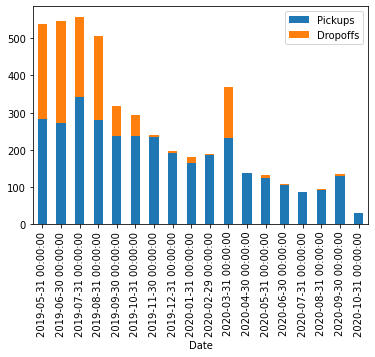

In [47]:
kykm.resample('M')[['Pickups', 'Dropoffs']].sum().plot(kind='bar', stacked=True);

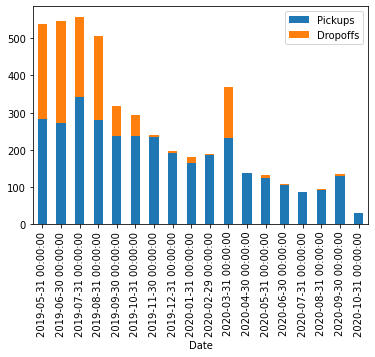

In [48]:
kykm.resample('M')[['Pickups', 'Dropoffs']].sum().plot(kind='bar', stacked=True);

In [49]:
pickups = kbfi['PULOC'] == 'KBFI'
dropoffs = kbfi['DropLoc'] == 'KBFI'

In [50]:
d = {'Pickups': kbfi[pickups].resample('D').size(), 'Dropoffs': kbfi[dropoffs].resample('D').size()}

In [51]:
kbfi = pd.DataFrame(d)
kbfi = kbfi[(kbfi.T != 0).any()]

In [52]:
kbfi['Airport'] = 'KBFI'

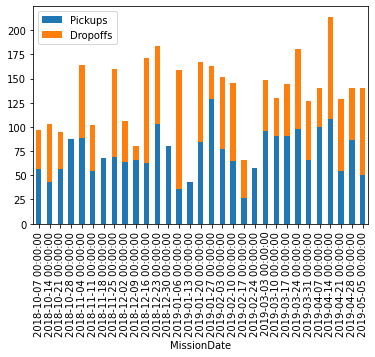

In [53]:
kbfi.resample('W')[['Pickups', 'Dropoffs']].sum().plot(kind='bar', stacked=True);

In [54]:
kbfi.loc['2019'].resample('M')[['Pickups', 'Dropoffs']].sum()

,Pickups,Dropoffs
MissionDate,,
2019-01-31,369,315
2019-02-28,246,171
2019-03-31,346,235
2019-04-30,398,365


In [55]:
temp = pd.concat([kbfi, kykm])

In [56]:
temp = temp.fillna(0)

In [68]:
temp = temp['2020-1-01':'2020-09-30']

In [75]:
temp

,Pickups,Dropoffs,Airport
2020-01-07,43.0,1.0,KYKM
2020-01-14,0.0,0.0,KYKM
2020-01-21,88.0,1.0,KYKM
2020-01-28,34.0,14.0,KYKM
2020-02-04,48.0,1.0,KYKM
2020-02-11,37.0,0.0,KYKM
2020-02-18,39.0,1.0,KYKM
2020-02-25,61.0,0.0,KYKM
2020-03-01,0.0,133.0,KYKM
2020-03-03,48.0,2.0,KYKM


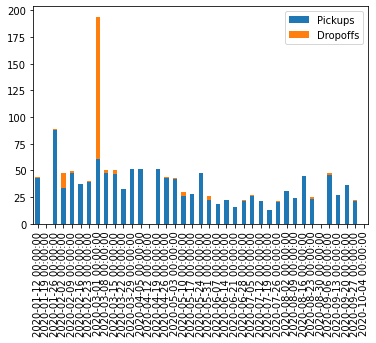

In [69]:
temp.resample('W')[['Pickups', 'Dropoffs']].sum().plot(kind='bar', stacked=True);

In [70]:
data = temp[temp['Airport'] == 'KYKM'].resample('M')[['Pickups', 'Dropoffs']].sum()

In [71]:
data.index = data.index.month_name().str[0:3]

In [76]:
data

,Pickups,Dropoffs
Jan,165.0,16.0
Feb,185.0,2.0
Mar,230.0,138.0
Apr,136.0,2.0
May,124.0,8.0
Jun,104.0,2.0
Jul,85.0,1.0
Aug,92.0,2.0
Sep,130.0,3.0


In [72]:
# temp.groupby(['Airport', pd.Grouper(freq='MS')]).sum().to_csv('ICEAirKBFIKYKM2019.csv')

In [73]:
def bar_chart(data, airport=str, airport_name=str, filename=str, title=str):
    fig, ax = plt.subplots()
    
    # FY shading
#     ax.axvspan(-2, 6.5, facecolor='g', alpha=0.1)
#     ax.axvspan(6.5, 14, facecolor='y', alpha=0.1)
    
    # CY shading
#     ax.axvspan(-2, 3.5, facecolor='g', alpha=0.1)
#     ax.axvspan(3.5, 14, facecolor='y', alpha=0.1)
    
    data.plot(kind='bar',
              ax=ax,
              stacked=True,
              title=f'{airport_name}',
              grid=True,
              figsize=(8,6),
              fontsize=14,
#               color=['g','y'],
              alpha=1)
    ax.set_axisbelow(True)
    ax.set_facecolor('#EEEEEE')
    ax.grid(color='#FFFFFF')
    ax.set_ylabel('Number of Passengers', fontsize=16)
    ax.set_ylim(0)
#     ax.set_xlabel('Month, FY19', fontsize=16)

    ax.set_title(f'{title}', fontsize=18)
    ax.tick_params(labelsize=14, labelrotation=0)
    

    
    ax.legend(bbox_to_anchor=(1.25, 1), loc='upper right', fontsize=14)
    
#     plt.figtext(.225, .825, 'KBFI (ICE data)', horizontalalignment='center', fontsize=16)
#     plt.figtext(.75, .825, 'KYKM (YIRN obs.)', horizontalalignment='center', fontsize=16)
    
    txt='UW Center for Human Rights, Yakima Immigrant Response Network'
    plt.figtext(1, 0, txt, wrap=True, horizontalalignment='right', fontsize=12)
    
#     plt.tight_layout()
    
    fig.set_size_inches(10, 8)
    fig.savefig(f'../output/KYKM_2020.png', bbox_inches='tight')
    plt.show()
    plt.close()

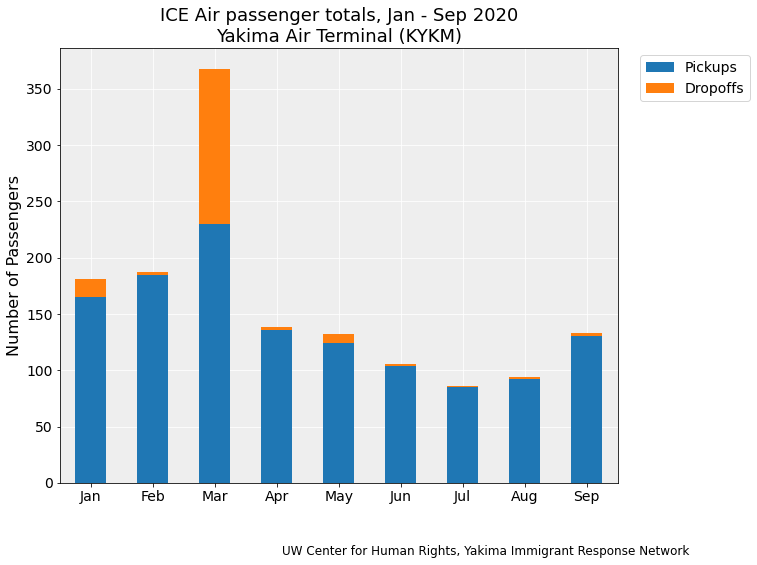

In [77]:
title = 'ICE Air passenger totals, Jan - Sep 2020\nYakima Air Terminal (KYKM)'
bar_chart(data, title=title)

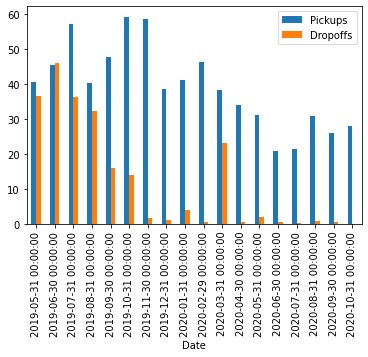

In [64]:
kykm.groupby([pd.Grouper(freq='M')]).mean().plot(kind='bar')

In [65]:
kykm.groupby([pd.Grouper(freq='MS')]).mean()

,Pickups,Dropoffs
Date,,
2019-05-01,40.428571,36.571429
2019-06-01,45.500000,45.833333
2019-07-01,57.000000,36.166667
2019-08-01,40.142857,32.142857
2019-09-01,47.600000,15.800000
2019-10-01,59.250000,14.000000
2019-11-01,58.500000,1.500000
2019-12-01,38.400000,1.000000
2020-01-01,41.250000,4.000000


In [81]:
temp.loc['2020-03':].sum()

Pickups                                                   901
Dropoffs                                                  156
Airport     KYKMKYKMKYKMKYKMKYKMKYKMKYKMKYKMKYKMKYKMKYKMKY...
dtype: object

In [82]:
temp

,Pickups,Dropoffs,Airport
2020-01-07,43.0,1.0,KYKM
2020-01-14,0.0,0.0,KYKM
2020-01-21,88.0,1.0,KYKM
2020-01-28,34.0,14.0,KYKM
2020-02-04,48.0,1.0,KYKM
2020-02-11,37.0,0.0,KYKM
2020-02-18,39.0,1.0,KYKM
2020-02-25,61.0,0.0,KYKM
2020-03-01,0.0,133.0,KYKM
2020-03-03,48.0,2.0,KYKM
